In [1]:


import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal
from pathlib import *

from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [3]:
# refpath=Path("I:\XRD\Thetascan")
# file = Path(askopenfilename(initialdir=refpath, title='´Select the folder, with images you want to normalise and select first image'))



In [4]:

file=Path("J:\\Users\Berners_Lukas\Thetascan\coolingrate")

In [5]:
xys=list(file.glob('**\*.xy'))

In [6]:
xys

[WindowsPath('J:/Users/Berners_Lukas/Thetascan/coolingrate/50_45_3mm_dic/5045_3mm_eps5_dic_exported_1.xy'),
 WindowsPath('J:/Users/Berners_Lukas/Thetascan/coolingrate/50_45_3mm_dic/5045_3mm_eps5_dic_exported_2.xy'),
 WindowsPath('J:/Users/Berners_Lukas/Thetascan/coolingrate/50_45_3mm_dic/5045_3mm_eps5_dic_exported_3.xy'),
 WindowsPath('J:/Users/Berners_Lukas/Thetascan/coolingrate/50_45_3mm_dic/5045_3mm_eps5_dic_exported_4.xy'),
 WindowsPath('J:/Users/Berners_Lukas/Thetascan/coolingrate/50_45_4mm_dic/5045_4mm_eps5_dic_exported_1_0.xy'),
 WindowsPath('J:/Users/Berners_Lukas/Thetascan/coolingrate/50_45_4mm_dic/5045_4mm_eps5_dic_exported_1_1.xy'),
 WindowsPath('J:/Users/Berners_Lukas/Thetascan/coolingrate/50_45_4mm_dic/5045_4mm_eps5_dic_exported_1_2.xy'),
 WindowsPath('J:/Users/Berners_Lukas/Thetascan/coolingrate/50_45_4mm_dic/5045_4mm_eps5_dic_exported_1_3.xy'),
 WindowsPath('J:/Users/Berners_Lukas/Thetascan/coolingrate/50_45_5mm_dic/5045_5mm_eps5_dic_exported_0.xy'),
 WindowsPath('J:/Use

In [7]:
datas=[]
for xy in file.glob('**\*.xy'):
    data=[]
    data=pd.read_csv(xy,sep=' ',skiprows=1,names=['2theta','intensity'])
    # if xy.stem[-1]=='4':
    #     data=data[data['2theta']>99]
    data['fname']=xy.parent.stem
    datas.append(data)
df=pd.concat(datas)

In [8]:
if xy.stem[-1]=='4':
    data=data[data['2theta']>99]

In [9]:
datas

[      2theta  intensity          fname
 0      35.00   1594.567  50_45_3mm_dic
 1      35.01   1604.538  50_45_3mm_dic
 2      35.02   1618.749  50_45_3mm_dic
 3      35.03   1610.409  50_45_3mm_dic
 4      35.04   1597.848  50_45_3mm_dic
 ...      ...        ...            ...
 2696   61.96    458.170  50_45_3mm_dic
 2697   61.97    452.987  50_45_3mm_dic
 2698   61.98    442.260  50_45_3mm_dic
 2699   61.99    439.624  50_45_3mm_dic
 2700   62.00    436.994  50_45_3mm_dic
 
 [2701 rows x 3 columns],
       2theta  intensity          fname
 0      62.01    483.626  50_45_3mm_dic
 1      62.02    473.801  50_45_3mm_dic
 2      62.03    466.635  50_45_3mm_dic
 3      62.04    465.789  50_45_3mm_dic
 4      62.05    461.958  50_45_3mm_dic
 ...      ...        ...            ...
 1895   80.96    235.718  50_45_3mm_dic
 1896   80.97    235.090  50_45_3mm_dic
 1897   80.98    234.237  50_45_3mm_dic
 1898   80.99    231.873  50_45_3mm_dic
 1899   81.00    231.793  50_45_3mm_dic
 
 [1900 row

In [10]:
import matplotlib.cm

In [11]:
import matplotlib as mpl

In [12]:
rgb(np.linspace(0,1,4))

NameError: name 'rgb' is not defined

50_45_3mm_dic
50_45_4mm_dic
50_45_5mm_dic
50_45_head_dic
C02_ascast


C:\Users\berners\AppData\Local\Temp\ipykernel_16644\2411244192.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rgb = mpl.cm.get_cmap('viridis',4)#[np.newaxis, :, :3]


IndexError: index 4 is out of bounds for axis 0 with size 4

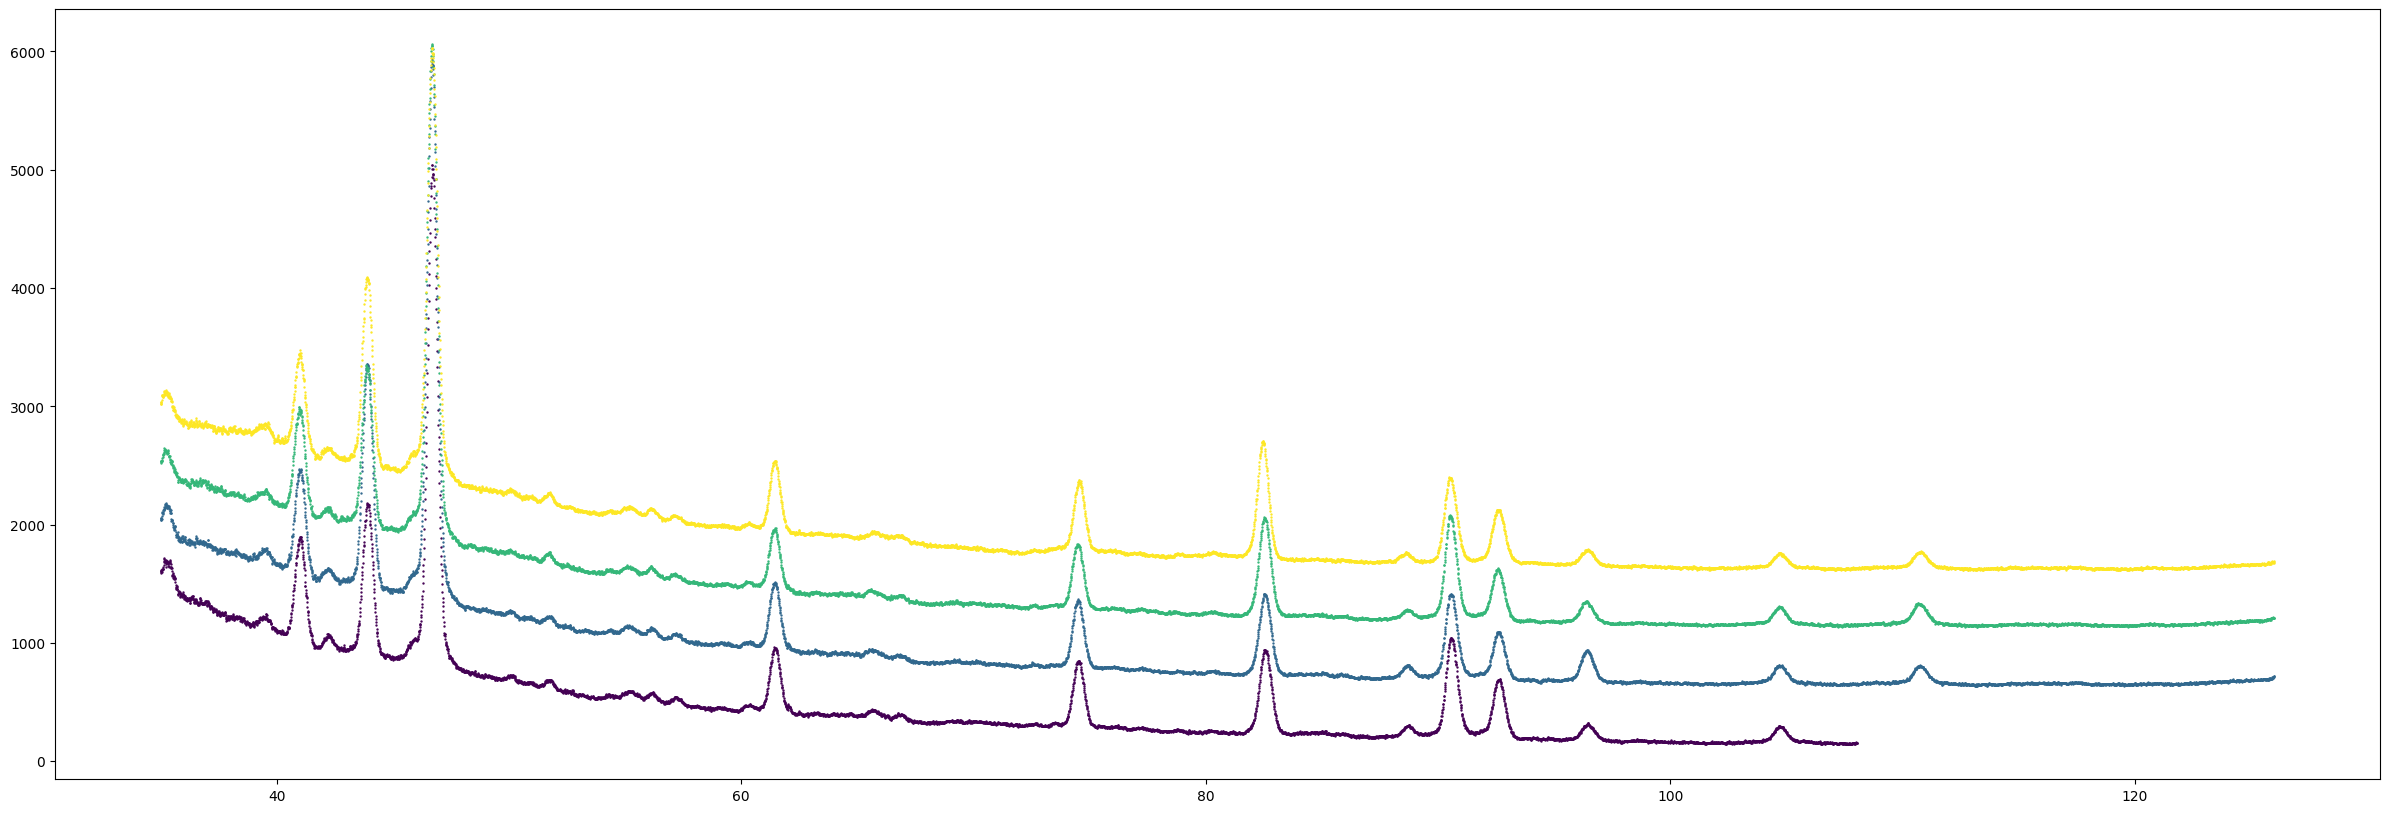

In [13]:
fig,ax=plt.subplots(figsize=(30,10))
import seaborn as sns
# color=['gray','red','blue']
rgb = mpl.cm.get_cmap('viridis',4)#[np.newaxis, :, :3]
rgb=rgb(np.linspace(0,1,4))
# colors=mp
i=0
for key in df['fname'].unique():
    print(key)
    data=df[df['fname']==key]
    ax.scatter(data['2theta'],data['intensity']+i*500,s=0.5,color=rgb[i],label=key)
    i=i+1
ax.legend()
ax.set_xlim(35,110)
plt.subplots

C:\Users\berners\AppData\Local\Temp\ipykernel_16644\3570870917.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\berners\AppData\Local\Temp\ipykernel_16644\3570870917.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rgb = mpl.cm.get_cmap('viridis')#[np.newaxis, :, :3]


50_45_3mm_dic
50_45_4mm_dic
50_45_5mm_dic
50_45_head_dic
C02_ascast


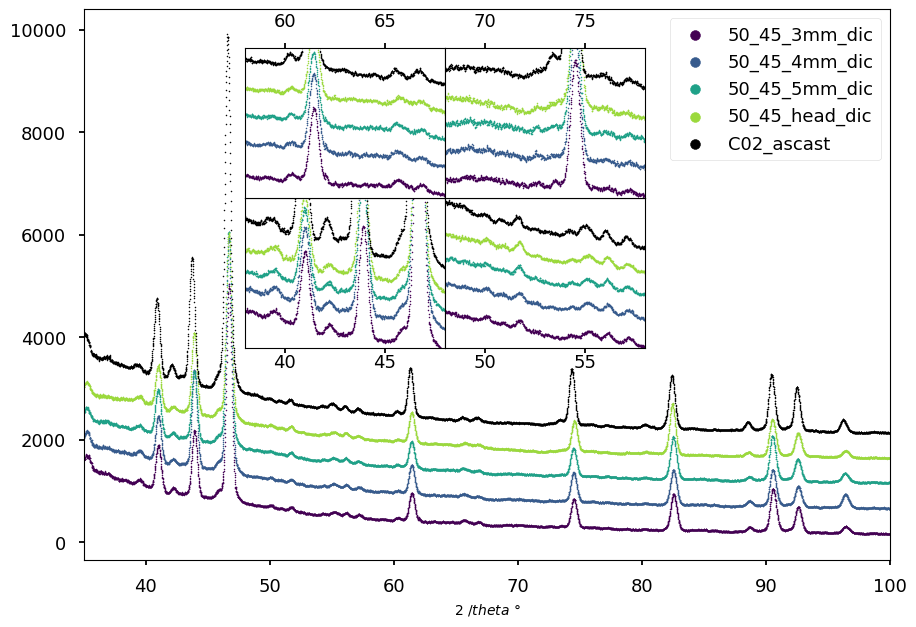

In [22]:
plt.style.use('seaborn-talk')
fig,ax=plt.subplots()
import seaborn as sns
# color=['gray','red','blue']
rgb = mpl.cm.get_cmap('viridis')#[np.newaxis, :, :3]
# np.append(rgb,[[0,0,0,1]],axis=0)
rgb=rgb(np.linspace(0,0.85,4))
rgb =np.append(rgb,[[0,0,0,1]],axis=0)
# colors=mp
i=0
for key in df['fname'].unique():
    print(key)
    data=df[df['fname']==key]
    ax.scatter(data['2theta'],data['intensity']+i*500,s=0.5,color=rgb[i],label=key)
    i=i+1
ax.legend(markerscale=10)
ax.set_xlim(35,100)
plt.subplots
ax.set_xlabel('2 $/theta$ °')
axins = inset_axes(ax, width=2,loc='upper right' ,height=1.5,bbox_to_anchor=(500,450))
i=0
for key in df['fname'].unique():
    # print(key)
    data=df[df['fname']==key]
    axins.scatter(data['2theta'],data['intensity']+i*200,s=0.5,color=rgb[i],label=key)
    i=i+1
axins.set_xlim(38,48)
axins.set_ylim(800,2500)
axins.set_yticks([])
axins.set_xlabel('2 theta')    
axins.xaxis.set_label_position('top') 
axins.tick_params(axis='x', which='major', pad=1)
axins2 = inset_axes(ax, width=2,loc='upper right' ,height=1.5,bbox_to_anchor=(700,450))
i=0
for key in df['fname'].unique():
    # print(key)
    data=df[df['fname']==key]
    axins2.scatter(data['2theta'],data['intensity']+i*200,s=0.5,color=rgb[i],label=key)
    i=i+1
axins2.set_yticks([])
axins2.set_xlim(48,58)
axins2.set_ylim(450,1750)
axins2.tick_params(axis='x', which='major', pad=1)

axins3 = inset_axes(ax, width=2,loc='upper right' ,height=1.5,bbox_to_anchor=(500,600))
i=0
for key in df['fname'].unique():
    # print(key)
    data=df[df['fname']==key]
    axins3.scatter(data['2theta'],data['intensity']+i*200,s=0.5,color=rgb[i],label=key)
    i=i+1
axins3.set_yticks([])
axins3.set_xlim(58,68)
axins3.set_ylim(300,1400)
axins3.xaxis.tick_top()

axins4 = inset_axes(ax, width=2,loc='upper right' ,height=1.5,bbox_to_anchor=(700,600))
i=0
for key in df['fname'].unique():
    # print(key)
    data=df[df['fname']==key]
    axins4.scatter(data['2theta'],data['intensity']+i*120,s=0.5,color=rgb[i],label=key)
    i=i+1
axins4.set_yticks([])
axins4.set_xlim(68,78)
axins4.set_ylim(250,900)
axins4.xaxis.tick_top()


In [ ]:
# C36 = xu.materials.Crystal('C36_Amerioun',xu.materials.SGLattice(194, 5.853,18.897,
#                                                                  atoms=[Mg,Al],#,Mg,Al,Al,Al,Ca,Ca],
#                                                                  pos=[('4f',(0.1291)),('6h')],#,('6g',(0,0.5,0.5)),('4f',(0.33333,0.66667,0.1291)),('6h',(0.1631,0.3262,0.25)),('6g',(0,0.5,0.5)),('4e',(0,0,0.0939)),('4f',(0.3333,0.66667,0.8428))],
#                                                                  occ=[0.72,0.28]#,0.81,0.19,0.5,0.5,1,1]
# ))

In [28]:
import numpy as np

import xrayutilities as xu
dif=xu.simpack.PowderDiffraction(C36,en=energy)

In [29]:
import numpy as np

import xrayutilities as xu


energy = 6403.84 ##https://xdb.lbl.gov/Section1/Table_1-2.pdf

# creating powder experiment

xup = xu.PowderExperiment(en=energy)

theta = np.arange(35,126, 0.01)
Mg=[]
Mg = xu.materials.elements.Mg

Al = xu.materials.elements.Al
Ca= xu.materials.elements.Ca
# c36_lattice=xu.materials.SGLattice(194, 5.853,18.897,)
# c36_wyck=c36_lattice.WyckofBase
wb=xu.materials.spacegrouplattice.WyckoffBase
C36 = xu.materials.Crystal('C36_Amerioun',xu.materials.SGLattice(194, 5.85,19.05,
                                                                 atoms=[Mg,Mg,Mg,Al,Al,Al,Ca,Ca],
                                                                 pos=[('4f',0.1291),(0.1631,0.3262,0.25),(0,0.5,0.5),('4f',0.1291),(0.1631,0.3262,0.25),(0,0.5,0.5),(0,0,0.0939),('4f',0.8428)],
                                                                 occ=[0.28,0.19,0.5,0.72,0.81,0.5,1,1]
                                                                 ))
mat = xu.materials.Crystal('Mg',xu.materials.SGLattice(194, 3.2092,5.2099,atoms=['Mg'],pos=[('2c')]))

q = xup.Ang2Q(theta)
dif_mg=xu.simpack.PowderDiffraction(mat,en=energy)
dif_c36=xu.simpack.PowderDiffraction(C36,en=energy)
# dif.profile_data()
# dif.energy=energy
# dif.init_powder_lines(35)
print(dif)

# dif.energy
miller_mg=[]
angles_mg=[]
intensities_mg=[]
for key in dif_mg.data.keys():
    miller_mg.append(key)
    angles_mg.append(dif_mg.data[key]['ang']*2)
    intensities_mg.append(dif_mg.data[key]['r'])
    dif.energy
miller_c36=[]
angles_c36=[]
intensities_c36=[]
for key in dif.data.keys():
    miller_c36.append(key)
    angles_c36.append(dif_c36.data[key]['ang']*2)
    intensities_c36.append(dif_c36.data[key]['r'])

XU.materials.SGLattice: position (0.1631, 0.3262, 0.25) identified as ('6h', [0.1631])
XU.materials.SGLattice: position (0, 0.5, 0.5) identified as 6g
XU.materials.SGLattice: position (0.1631, 0.3262, 0.25) identified as ('6h', [0.1631])
XU.materials.SGLattice: position (0, 0.5, 0.5) identified as 6g
XU.materials.SGLattice: position (0, 0, 0.0939) identified as ('4e', [0.4061])

Powder diffraction object 
-------------------------
Powder-C36_Amerioun (a: 5.85, c: 19.05, at0_Mg_4f_0_pos: 0.1291, at1_Mg_6h_0_pos: 0.1631, at3_Al_4f_0_pos: 0.1291, at4_Al_6h_0_pos: 0.1631, at6_Ca_4e_0_pos: 0.4061, at7_Ca_4f_0_pos: 0.8428, at0_Mg_4f_occupation: 0.28, at1_Mg_6h_occupation: 0.19, at2_Mg_6g_occupation: 0.5, at3_Al_4f_occupation: 0.72, at4_Al_6h_occupation: 0.81, at5_Al_6g_occupation: 0.5, at6_Ca_4e_occupation: 1, at7_Ca_4f_occupation: 1, at0_Mg_4f_biso: 0, at1_Mg_6h_biso: 0, at2_Mg_6g_biso: 0, at3_Al_4f_biso: 0, at4_Al_6h_biso: 0, at5_Al_6g_biso: 0, at6_Ca_4e_biso: 0, at7_Ca_4f_biso: 0, volume:

In [22]:
max_c36=max(intensities_c36)

C:\Users\berners\AppData\Local\Temp\ipykernel_17396\1786590382.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
C:\Users\berners\AppData\Local\Temp\ipykernel_17396\1786590382.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rgb = mpl.cm.get_cmap('viridis')#[np.newaxis, :, :3]


50_45_3mm_dic
50_45_4mm_dic
50_45_5mm_dic
50_45_head_dic
C02_ascast


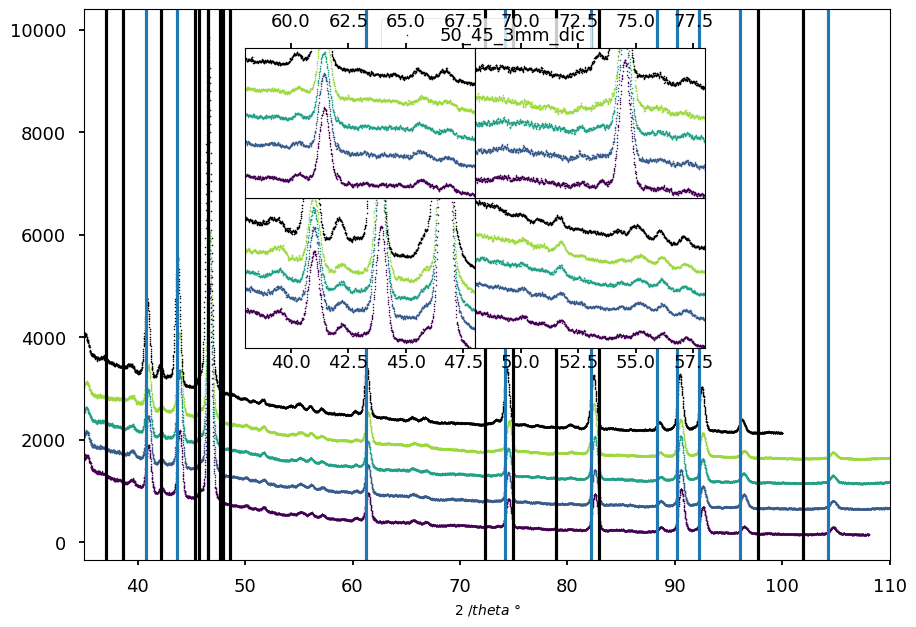

In [30]:
plt.style.use('seaborn-talk')
fig,ax=plt.subplots()
import seaborn as sns
# color=['gray','red','blue']
rgb = mpl.cm.get_cmap('viridis')#[np.newaxis, :, :3]
# np.append(rgb,[[0,0,0,1]],axis=0)
rgb=rgb(np.linspace(0,0.85,4))
rgb =np.append(rgb,[[0,0,0,1]],axis=0)
# colors=mp
i=0
for key in df['fname'].unique():
    print(key)
    data=df[df['fname']==key]
    ax.scatter(data['2theta'],data['intensity']+i*500,s=0.5,color=rgb[i],label=key)
    i=i+1
ax.legend()
ax.set_xlim(35,110)
plt.subplots
ax.set_xlabel('2 $/theta$ °')
axins = inset_axes(ax, width=2.3,loc='upper right' ,height=1.5,bbox_to_anchor=(530,450))

for ang in angles_mg:
    ax.axvline(x=ang,ymin=0,ymax=5000)
k=0
for ang in angles_c36:
    if intensities_c36[k]>0.1*max_c36:
        ax.axvline(x=ang,ymin=0,ymax=5000,color='black')
    k=k+1
i=0
for key in df['fname'].unique():
    # print(key)
    data=df[df['fname']==key]
    axins.scatter(data['2theta'],data['intensity']+i*200,s=0.5,color=rgb[i],label=key)
    i=i+1
axins.set_xlim(38,48)
axins.set_ylim(800,2500)
axins.set_yticks([])
axins.set_xlabel('2 theta')    
axins.xaxis.set_label_position('top') 
axins.tick_params(axis='x', which='major', pad=1)
axins2 = inset_axes(ax, width=2.3,loc='upper right' ,height=1.5,bbox_to_anchor=(760,450))
i=0
for key in df['fname'].unique():
    # print(key)
    data=df[df['fname']==key]
    axins2.scatter(data['2theta'],data['intensity']+i*200,s=0.5,color=rgb[i],label=key)
    i=i+1
axins2.set_yticks([])
axins2.set_xlim(48,58)
axins2.set_ylim(450,1750)
axins2.tick_params(axis='x', which='major', pad=1)

axins3 = inset_axes(ax, width=2.3,loc='upper right' ,height=1.5,bbox_to_anchor=(530,600))
i=0
for key in df['fname'].unique():
    # print(key)
    data=df[df['fname']==key]
    axins3.scatter(data['2theta'],data['intensity']+i*200,s=0.5,color=rgb[i],label=key)
    i=i+1
axins3.set_yticks([])
axins3.set_xlim(58,68)
axins3.set_ylim(300,1400)
axins3.xaxis.tick_top()

axins4 = inset_axes(ax, width=2.3,loc='upper right' ,height=1.5,bbox_to_anchor=(760,600))
i=0
for key in df['fname'].unique():
    # print(key)
    data=df[df['fname']==key]
    axins4.scatter(data['2theta'],data['intensity']+i*120,s=0.5,color=rgb[i],label=key)
    i=i+1
axins4.set_yticks([])
axins4.set_xlim(68,78)

axins4.set_ylim(250,900)
axins4.xaxis.tick_top()


In [37]:
cif_c36=xu.materials.cif.CIFFile('I:\CIF\C36.cif')

In [52]:
with open('I:\CIF\C36.cif') as f:
    c36_data=xu.materials.cif.CIFDataset(f,'c36_mg',digits=4)

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
pd.read_csv('I:\CIF\Mg\Mg.txt',sep='  ')

C:\Users\berners\AppData\Local\Temp\ipykernel_15636\2646380299.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pd.read_csv('I:\CIF\Mg\Mg.txt',sep='  ')


,h,Unnamed: 1,k,Unnamed: 3,l,Unnamed: 5,Unnamed: 6,d(Å),Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,2θ,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,I,Unnamed: 28,M ID(λ) Phase
0,0,NaN,0.0,-1.00000,5.20990,NaN,0.0,NaN,0.0,NaN,...,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,0.0,NaN,1.00000,5.209900,NaN,0.000000,NaN,0.000000,...,1.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
2,0,NaN,0.0,-1.00000,5.20990,NaN,0.0,NaN,0.0,NaN,...,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,0.0,NaN,1.00000,5.209900,NaN,0.000000,NaN,0.000000,...,1.0,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,1,NaN,0.0,NaN,0.00000,2.779249,NaN,-9.256868,NaN,-0.286576,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,2,-1.0,-3.0,1.17854,NaN,0.000000,NaN,0.000000,NaN,NaN,...,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,-2,NaN,1.0,NaN,3.00000,1.178540,NaN,0.000000,NaN,0.000000,...,1.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
313,-1,NaN,2.0,-3.00000,1.17854,NaN,0.0,NaN,0.0,NaN,...,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
314,2,-1.0,-3.0,1.17854,NaN,0.000000,NaN,0.000000,NaN,NaN,...,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
angles

NameError: name 'angles' is not defined